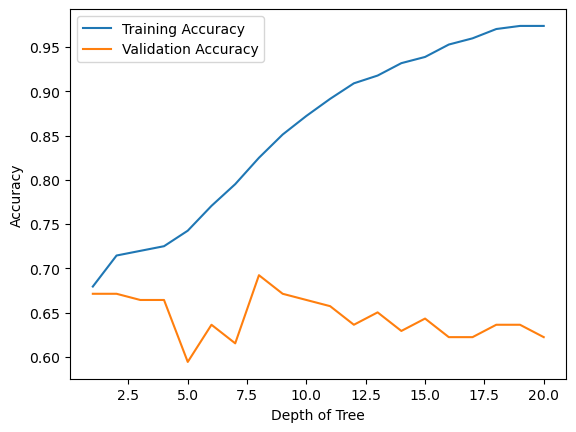

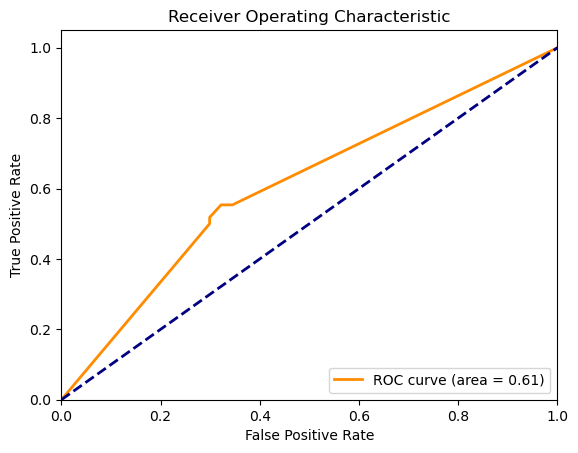

Accuracy with single train-test split: 0.6293706293706294
Cross-validation scores: [0.55944056 0.74125874 0.65034965 0.65034965 0.65492958]
Mean cross-validation score: 0.6512656357726782
Precision: 0.5185185185185185
Recall: 0.5
F1-Score: 0.509090909090909
Logistic Regression CV Mean Score: 0.6512656357726782
Decision Tree CV Mean Score: 0.6204570077809514
Logistic Regression Accuracy without CV: 0.6293706293706294
Decision Tree Accuracy without CV: 0.6223776223776224


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\ML A-Z\ByteWise Fellowship\Datasets\titanic - titanic.csv")
data = data.dropna(subset=['Age', 'Fare'])
X = data[['Age', 'Fare']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
cv_scores = cross_val_score(model, X, y, cv=5)

depths = range(1, 21)
train_accuracies = []
val_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    val_accuracies.append(model.score(X_test, y_test))

plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

log_reg_cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
tree_cv_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_accuracy = log_reg.score(X_test, y_test)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_accuracy = tree.score(X_test, y_test)

print(f'Accuracy with single train-test split: {accuracy}')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Logistic Regression CV Mean Score: {log_reg_cv_scores.mean()}')
print(f'Decision Tree CV Mean Score: {tree_cv_scores.mean()}')
print(f'Logistic Regression Accuracy without CV: {log_reg_accuracy}')
print(f'Decision Tree Accuracy without CV: {tree_accuracy}')
